# Podstawowe predykaty geometryczne, przeprowadzanie testów, wizualizacja i opracowanie wyników

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from bitalg.tests.test1 import Test
from bitalg.visualizer.main import Visualizer

# Przydatne funkcje 

In [31]:
def draw_points(points):
    vis = Visualizer()
    vis.add_point(points, s=30, color='green')
    vis.show()

In [32]:
def draw_line(points_left, points_mid, points_right,s=30):
    vis = Visualizer()
    vis.add_line(((-1.0, 0.0), (1.0,0.1)), color='red')
    vis.add_point(points_left, s=s, color=['green'])
    vis.add_point(points_right, s=s, color=['orange'])
    vis.add_point(points_mid, s=s, color=['purple'])
    vis.show()

In [33]:
def draw_example():
    vis = Visualizer()
    vis.add_line(((0, 2), (10, 7)))
    vis.add_point((4, 4), s=30, color='green')
    vis.add_point((6, 6), s=30, color='red')
    vis.add_point((7, 4), s=30, color='purple')
    vis.show()

### Wprowadzenie
Celem ćwiczenia jest określenie po której stronie prostej znajduje się punkt.

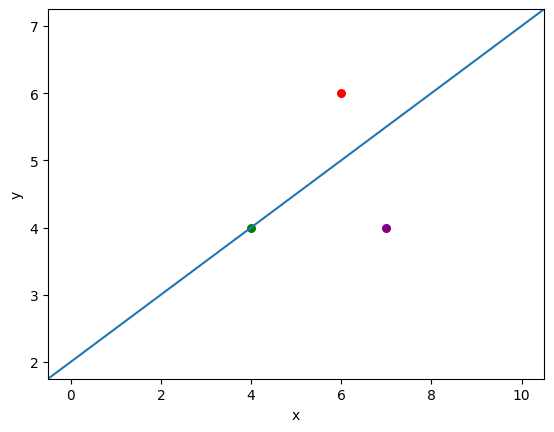

In [34]:
draw_example()

Do tego celu potrzebujesz wygenerować zbiory punktów testowych.


# Generowanie losowych punktów na płaszczyźnie

Uzupełnij funkcję ```generate_uniform_points```
 (Aby generować losowo liczby rzeczywiste bardzo przydatna może okazać się jakaś funkcja biblioteczna)

In [35]:
def generate_uniform_points(left, right, n = 10 ** 5):
    """
    Funkcja generuje równomiernie n punktów na kwadratowym obszarze od left do right (jednakowo na osi y) o współrzędnych rzeczywistych
    :param left:  lewy kraniec przedziału
    :param right: prawy kraniec przedziału
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych np. [(x1, y1), (x2, y2), ... (xn, yn)]
    """
    return [np.random.uniform(left, right, 2) for _ in range(n)]

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $x, y \in \left[-1000,1000\right]^{2}$.

In [36]:
points_a = generate_uniform_points(-1000, 1000, 10 ** 5)

Zwizualizuj wygenerowane punkty

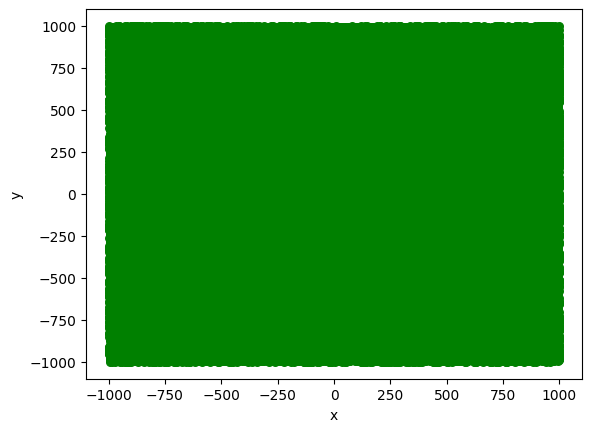

In [37]:
draw_points(points_a)

<span style="color:red">Ćw.</span> Wygeneruj $10^5$ losowych punktów w przestrzeni 2D o współrzędnych z przedziału $ x, y \in \left[-10^{14},10^{14}\right]^{2}$. Uzupełnij funkcję ```generate_big_num_of_points_2D```. Sprawdź, czy różni się wizualizalnie wynik tego ćwiczenia z poprzednim.

In [38]:
points_b = generate_uniform_points(-10 ** 14, 10 ** 14, 10 ** 5)

Zwizualizuj wygenerowane punkty.

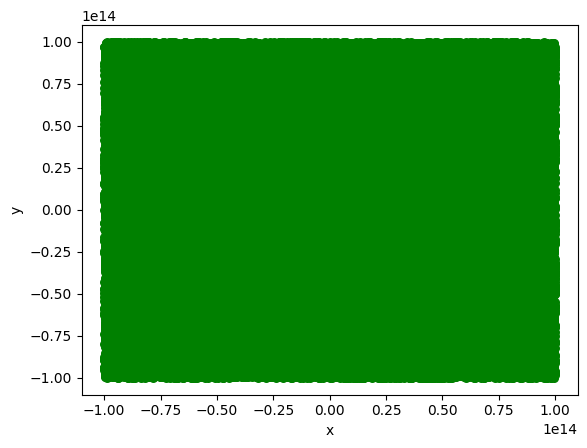

In [39]:
draw_points(points_b)

Uzupełnij funkcję ```generate_circle_points```

Zastanów się w sposób generować punkty jednostajnie na okręgu.

In [40]:
def generate_circle_points(O, R, n = 100):
    """
    Funkcja generuje jednostajnie n punktów na okręgu o środku O i promieniu R
    :param O: krotka współrzędnych x, y określająca środek okręgu
    :param R: promień okręgu 
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    x0,y0 = O
    points = [None for _ in range(n)]
    for i in range(n):
        angle = np.random.uniform(0, 2 * np.pi)
        x = R*np.cos(angle)
        y = R*np.sin(angle)
        points[i] =  (x0+x, y0+y) 
    return points

<span style="color:red">Ćw.</span> Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D leżących na okręgu o środku $ O = (0,0)$ i promieniu $ R = 100$. 

Uzupełnij funkcję ```generate_points_on_circle_2D```.

In [41]:
points_c = generate_circle_points((0, 0), 100)

Zwizualizuj wygenerowane punkty.

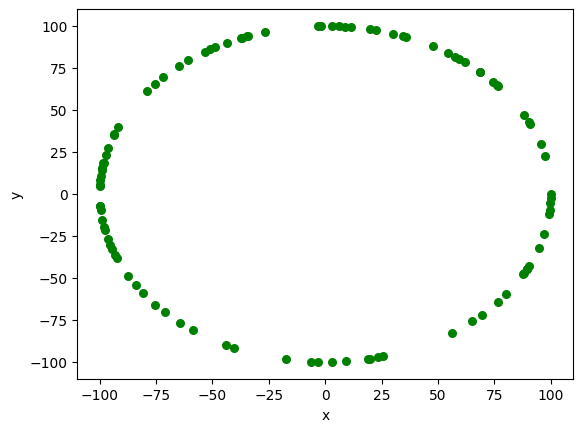

In [42]:
draw_points(points_c)

Uzupełnij funkcję ```generate_collinear_points```.

In [43]:
def generate_collinear_points(a, b, n=100):
    """
    Funkcja generuje równomiernie n współliniowych punktów leżących na odcinku ab pomiędzy punktami a i b
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param n: ilość generowanych punktów
    :return: tablica punktów w postaci krotek współrzędnych
    """
    x1,y1 = a
    x2, y2 = b
    v = [x2-x1, y2-y1]
    x_range = 1000/v[0] if v[0] != 0 else 0
    x = lambda t: x1 + t*v[0]
    y = lambda t: y1 + t*v[1]
    P = lambda t: (x(t), y(t))
    points = [None for _ in range(n)]
    for i in range(n):
        t = np.random.uniform(-x_range,x_range)
        points[i] = P(t)
    return points

<span style="color:red">Ćw.</span>  Wygeneruj $ 1000$ losowych punktów w przestrzeni 2D o współrzędnej z przedziału $ x \in \langle -1000,1000 \rangle$ leżących na prostej wyznaczonej przez wektor $ \overrightarrow{ab}$. Przyjmij punkty $ a = (-1.0, 0.0)$ oraz $ b = (1.0, 0.1)$. Uzupełnij funkcję ```generate_points_on_line_2D```.

In [44]:
points_d = generate_collinear_points((-1.0, 0.0), (1.0,0.1))

Zwizualizuj wygenerowane punkty.

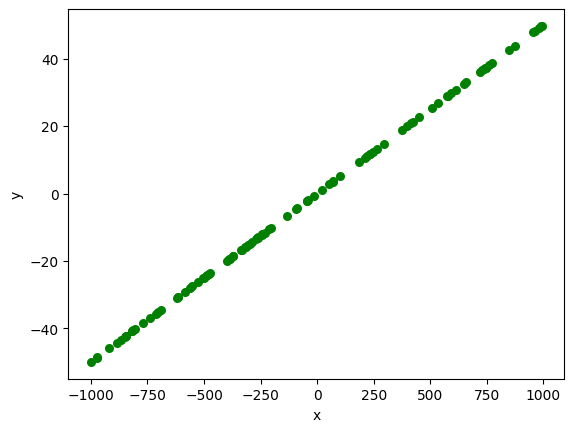

In [45]:
draw_points(points_d)

Przeprowadź test poprawności powyższych funkcji

In [46]:
Test().runtest(1, generate_uniform_points, generate_circle_points, generate_collinear_points)

Lab 1, task 1:
	Test 1: 

Passed
	Test 2: Passed
	Test 3: Passed
	Test 4: Passed
Result: 4/4
Time: 0.798s


# Po której stornie prostej znajduje się punkt?

Prostym sposobem do obliczenia, po której stronie prostej znajduje się punkt jest obliczenie iloczynu wektorowego 
$\overrightarrow{ab} \times \overrightarrow{ac}$, gdzie $ c = (x,y)$ jest punktem, dla którego poszukujemy wiadomości o lokalizacji względem prostej przechodzącej przez punkty $ a$ i $ b$. Metoda ta jest równoznaczna z obliczeniem wyznacznika macierzy $ 2\times2$:  

$$
(1)\det(a, b, c)= \begin{vmatrix}
       a_{x} - c_{x} & a_{y} - c_{y} \\
       b_{x} - c_{x} & b_{y} - c_{y} 
              \end{vmatrix}
$$


lub wyznacznika macierzy $ 3\times3$:

$$
(2)\det(a, b, c)= \begin{vmatrix}
       a_{x} & a_{y} & 1 \\
       b_{x} & b_{y} & 1 \\
       c_{x} & c_{y} & 1
              \end{vmatrix}
$$

Upraszczając tą macierz przez odjęcie drugiego wiersza od trzeciego i odjęcie pierwszego wiersza od drugiego otrzymamy:

$$
\det(a, b, c)  = \begin{vmatrix}
              a_{x}         & a_{y}         & 1 \\
              b_{x} - a_{x} & b_{y} - a_{y} & 0 \\
              c_{x} - b_{x} & c_{y} - b_{y} & 0
                     \end{vmatrix}
              = (b_{x} - a_{x})(c_{y} - b_{y}) - (b_{y} - a_{y})(c_{x} - b_{x})
$$

Jest to wzór, z który opisuje pole równoległoboku mającego boki $ ab$ oraz $ ac$ (Dowód dlaczego tak jest, do zrobienia w domu)  
Dlaczego wiemy, że po obliczeniu wskaźnika podanego powyżej będziemy wiedzieć, po której stornie prostej znajduje się punkt?</font>
<font size="1">
</br>
***

**Dowód**:  

Załóżmy, że mamy dane trzy punkty w przestrzeni 2-wymiarowej $A, B$ oraz $C$. Znajdujemy prostą przechodzącą przez punkty $A$ i $B$. Następnie obliczamy $C_{y}$ przy danym $C_{x}$ i sprawdzamy czy punkt leży nad czy pod prostą.
Współczynnik nachylenia prostej jest nastepujący:

$$a = \frac{B_{y} - A_{y}}{B_{x} - A_{x}}
$$
Natomiast współczynnik $b$ wynosi:

$$b = B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}
$$

Po wpisaniu do równania $y = ax + b$ wyliczonego nachylenia prostej, współczynnika $b$ oraz zmiennej $C_{x}$ otrzymujemy:

$$y = \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x}+ \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right)
$$

Otzymujemy punkt $C$ po lewej stronie prostej jeżeli $C_{y} - y > 0$, po prawej jeżeli $C_{y} - y < 0$, a punkt $C$ leżący na prostej, jeżeli $C_{y} - y = 0$. Przekształcimy powyższe równanie dla $C_{y} - y > 0$:

$$C_{y} - y > 0$$ 
$$C_{y} - \left(\frac{B_{y} - A_{y}}{B_{x} - A_{x}}\right)C_{x} - \left(B_{y} - \frac{(B_{y} - A_{y})B_{x}}{B_{x} - A_{x}}\right) > 0$$
$$C_{y}(B_{x} - A_{x}) - C_{x}(B_{y} - A_{y}) - B_{y}(B_{x} - A_{x}) + B_{x}(B_{y} - A_{y}) > 0$$
$$(C_{y} - B_{y})(B_{x} - A_{x}) + (B_{x} - C_{x})(B_{y} - A_{y}) > 0$$ 
$$(C_{y} - B_{y})(B_{x} - A_{x}) - (C_{x} - B_{x})(B_{y} - A_{y}) > 0$$

Zatem widzimy, że ostatnie równie jest takie same co przy równaniu wyznacznika macierzy $3\times3$. Niejawnie założyliśmy tutaj, że $B_{x}$ jest wieksze od $A_{x}$ , jeżeli byłoby odwrotnie zmieniłby się tylko znak nierówności na przeciwny. W naszym przypadku pokazaliśmy, że $C$ znajduje się po lewej stronie prostej jeżeli wyznacznik jest dodatni oraz po prawej stronie prostej, jeżeli wyznacznik jest ujemny. $Q.E.D$

---
Kolejnym zadaniem będzie zaimplementowanie własnych wyznaczników $(1)$ oraz $(2)$ i porówanie ich szybkości działania z wyznacznikami bibliotecznymi w testowaniu dla różnych zbiorów punktów. Co dodatkowo chcemy sprawdzić, czy wszystkie wyznaczniki podobnie kwalifikują podział względem danej lini.

Uzupełnij funkcje ```mat_det_3x3```

In [47]:
def mat_det_3x3(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax,ay = a
    bx,by = b
    cx,cy = c
    return (bx-ax)*(cy-by)-(by-ay)*(cx-bx)

Uzupełnij funkcję ```mat_det_3x3_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [48]:
def mat_det_3x3_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 3x3 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    mat = np.array([[*a,1],[*b,1],[*c,1]])
    return (np.linalg.det(mat))

Uzupełnij funkcje ```mat_det_2x2```

In [49]:
def mat_det_2x2(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 bez użycia funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ax,ay = a
    bx,by = b
    cx,cy = c
    return (ax-cx)*(by-cy)-(ay-cy)*(bx-cx)
    

Uzupełnij funkcję ```mat_det_2x2_lib```, ale tym razem wykorzystaj dowolną funckję biblioteczną do obliczenia wyznacznika

In [50]:
def mat_det_2x2_lib(a, b, c):
    """
    Obliczanie wyznacznika macierzy 2x2 z użyciem funkcji bibliotecznych
    :param a: krotka współrzędnych (x, y) pierwszego punktu tworzącego naszą prostą
    :param b: krotka współrzędnych (x, y) drugiego punktu tworzącego naszą prostą
    :param c: krotka współrzędnych (x, y) punktu, którego położenie względem prostej chcemy znaleźć
    :return: wartość wyznacznika macierzy
    """
    ab_mat = np.array([[*a],[*b]])
    c_mat = np.array([*c])
    mat = ab_mat-c_mat
    return np.linalg.det(mat)

Przetestujmy napisane powyżej funkcje.

In [51]:
Test().runtest(2, mat_det_3x3, mat_det_2x2, mat_det_3x3_lib, mat_det_2x2_lib)

Lab 1, task 2:
	Test 1: Passed
	Test 2: Passed
Result: 2/2
Time: 0.000s


<span style="color:red">Ćw.</span> Klasyfikacja punktów względem prostej - zaimplementuj funkcję ```categorize_points```, która skwalifukuje punkty względem prostej wyznacznonej przez wektor $\large \overrightarrow{ab}$ (prosta przechodząca przez punkty $\large a$ oraz $\large b$.

In [52]:
def categorize_points(points, a, b, mat_det_func, eps):
    """
    :param points: tablica punktów w postaci krotek współrzednych
    :param a: krotka współrzędnych oznaczająca początek odcinka
    :param b: krotka współrzędnych oznaczająca koniec odcinka
    :param mat_det_func: funkcja która będzie tutaj używana do obliczenia wyznacznika macierzy
    :param eps: epsilon - jak blisko wyznacznik macierzy ma być blisko zera, aby uznać punkt za leżący na prostej
    :return: 3 tablice zawierające kolejno zbiory punktów: leżące na lewo od prostej, leżące na prostej, leżące na prawo od prostej
    """
    result = [[], [], []]
    for c in points:
        det = mat_det_func(a,b,c)
        if abs(det) <= eps:
            result[1].append(c)
        elif det > eps:
            result[0].append(c)
        elif det < eps:
            result[2].append(c)
    return result

In [53]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

Zwizualizuj sklasyfikowane punkty. Punkty różnią się kolorami ze względu na klasyfikację: na lewo od prostej - zielone, na prostej - fioletowe, na prawo - pomarańczowe.

In [54]:
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_a, a, b, mat_det_3x3, 10 ** -12)

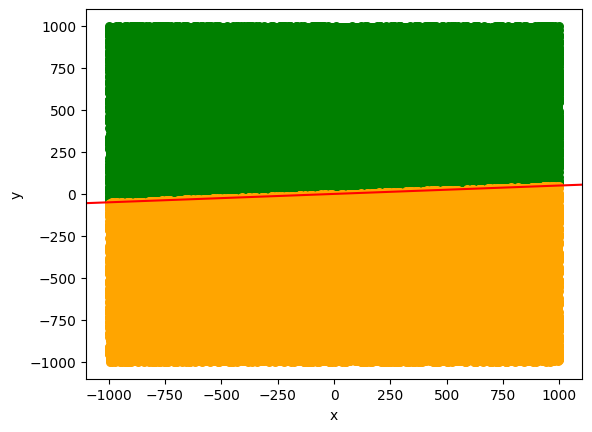

In [55]:
draw_line(classified_points_a_left, classified_points_a_mid, classified_points_a_right)

In [56]:
classified_points_b_left,classified_points_b_mid,classified_points_b_right = categorize_points(points_b, a, b, mat_det_3x3_lib, 10 ** -12)

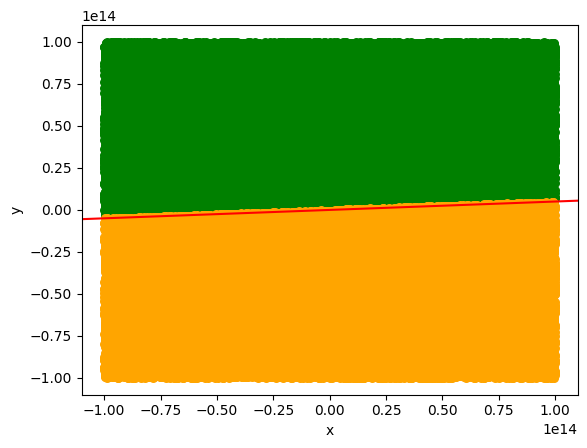

In [57]:
draw_line(classified_points_b_left, classified_points_b_mid, classified_points_b_right)

In [58]:
classified_points_c_left,classified_points_c_mid,classified_points_c_right = categorize_points(points_c, a, b, mat_det_2x2, 10 ** -12)

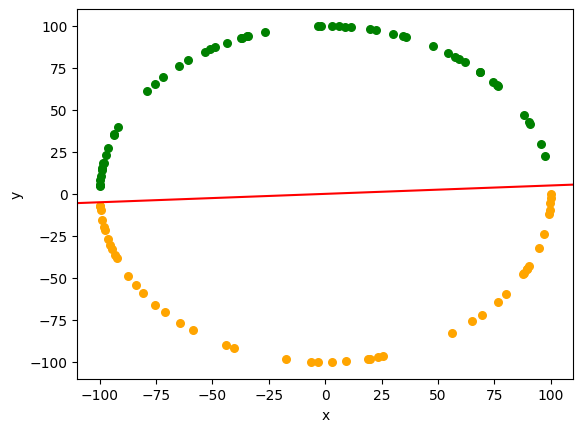

In [59]:
draw_line(classified_points_c_left, classified_points_c_mid, classified_points_c_right)

In [60]:
classified_points_d_left,classified_points_d_mid,classified_points_d_right = categorize_points(points_d, a, b, mat_det_2x2_lib, 10 ** -12)

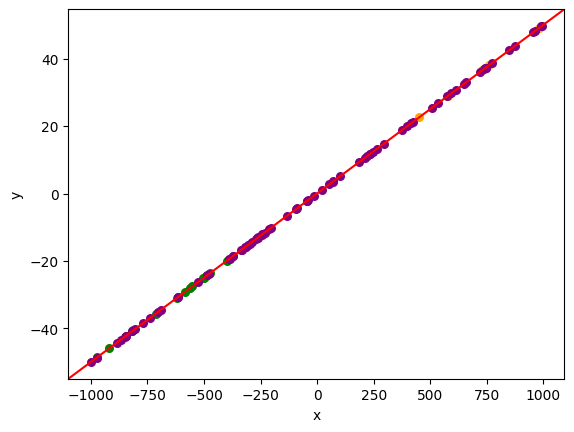

In [61]:
draw_line(classified_points_d_left, classified_points_d_mid, classified_points_d_right)

Przeprowadźmy teraz testy dla mniejszej precyzji obliczeń. Do tego celu należy zmiejszyć typ danych z float64 (domyślny typ floata w pythonie) na float32. Różnią się one tym, że float32 jest zapisywane na mniejszej ilości bitów, co przekłada się no mniejszą ilosć cyfr po przecinku.
Zamienić typ floata w całej tablicy można zrobić w następujący sposób:

In [62]:
points_a_float32 = np.float32(points_a)

Porównaj wyniki klasyfikacji dla współrzędnych punktów o zmiejszonej precyzji floata

## Opisz swoje wnioski na podstawie przeprowadzonych własnoręcznie testów.


In [63]:
points_e = generate_uniform_points(-1,1,5000)

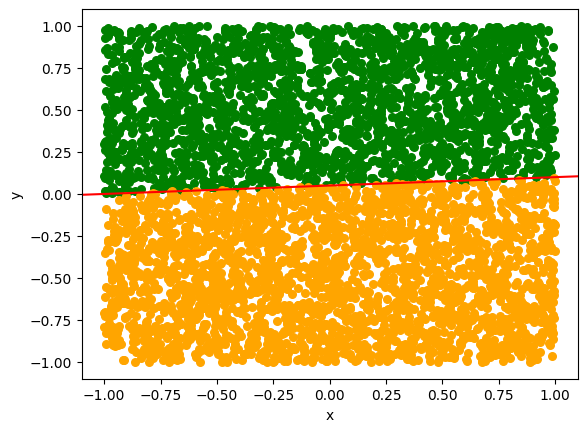

In [64]:

classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_e, a, b, mat_det_3x3, 10 ** -12)
draw_line(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

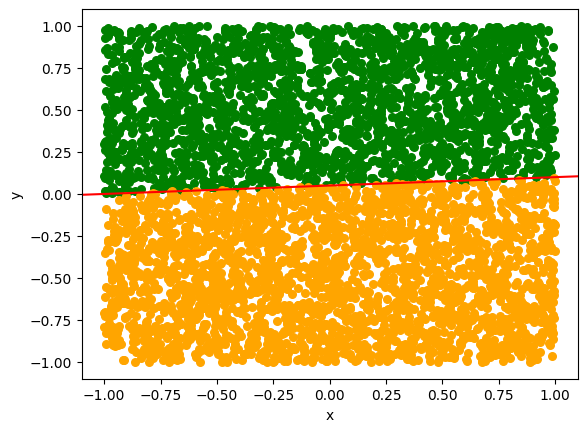

In [65]:
points_e_float32 = np.float32(points_e)
classified_points_a_left,classified_points_a_mid,classified_points_a_right = categorize_points(points_e_float32, a, b, mat_det_3x3, 10 ** -12)
draw_line(classified_points_a_left,classified_points_a_mid,classified_points_a_right)

Wniosek: punkty w postaci float32 są znacznie rzadziej rozmieszczone mimo tej samej ilości punktów. Wynika to z mniejszej ilości bitów na zapisanie liczby, co powoduje, że liczby są bardziej zaokrąglone. W przypadku float64 liczby są bardziej dokładne, co powoduje, że punkty są bardziej rozmieszczone.

DO ZROBIENIA

porównanie 4 setów punktów (a,b,c,d) przez 4 wyznaczniki 2x2, 2x2lib, 3x3, 3x3lib

eps = 1e-14 <br>
eps = 1e-12 <br>
eps = 1e-10 <br>
eps = 1e-8 <br>


TESTY

In [66]:
a = (-1.0, 0.0)
b = (1.0, 0.1)

In [67]:
epsilons = [1e-14,1e-12,1e-10,1e-8]
dets = [("mat_det_2x2",mat_det_2x2),("mat_det_2x2_lib",mat_det_2x2_lib),("mat_det_3x3",mat_det_3x3),("mat_det_3x3_lib",mat_det_3x3_lib)]

In [27]:
points_array = [generate_uniform_points(-10**3,10**3,10**5),generate_uniform_points(-10**14,10**14,10**5),generate_circle_points((0,0),5,100), generate_collinear_points(a,b,100)]

In [68]:
def generateTableResult(points_arr,draw = False,save=False,desc=""):
    for p,points in enumerate(points_arr):
        arr_list = np.zeros((4,4,3)).astype(int)
        det_names = [i[0] for i in dets]
        for e,eps in enumerate(epsilons):
            arr = []
            for _,det in dets:
                categorizedPoints = categorize_points(points,a,b,det,eps)
                if draw:
                    draw_line(*categorizedPoints)
                arr.append(np.array([len(i) for i in categorizedPoints]))
            arr_list[e]=np.array(arr)
        labels = [f"eps={str(e)}" for e in epsilons]
        df_list = []
        for i, arr in enumerate(arr_list):
            df = pd.DataFrame(arr, columns=["left", "middle", "right"])
            df = df.set_index(pd.Index(det_names))
            df_list.append(df)
        df_concat = pd.concat(df_list, keys=labels)
        if save:
            df_concat.to_csv(fr'./out{p}{desc}.csv')
    return df_concat

In [70]:
df = generateTableResult(points_array,save=True)

In [71]:
points_array_float32 = [np.float32(np.array(points_array[i])) for i in range(len(points_array))] 

In [ ]:
df = generateTableResult(points_array_float32,save=True,desc="float")

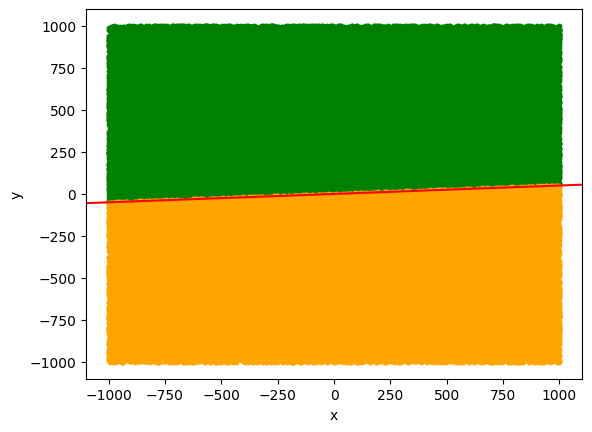

In [74]:
draw_line(*categorize_points(points_array[0],a,b,mat_det_2x2_lib,1e-12),s=10)

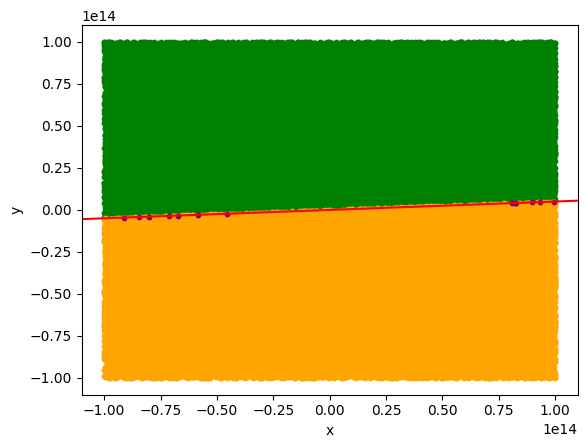

In [78]:
draw_line(*categorize_points(points_array_float32[1],a,b,mat_det_2x2,1e-14),s=10)

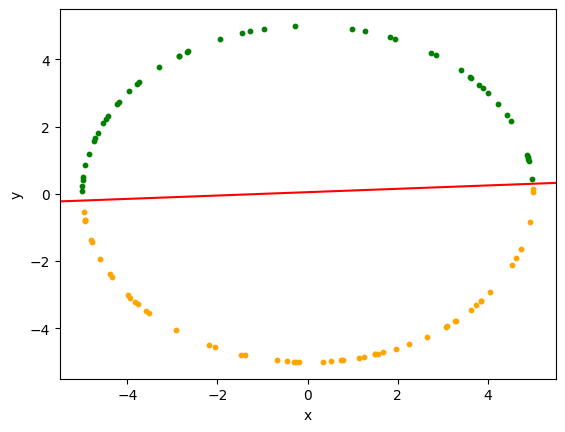

In [79]:
draw_line(*categorize_points(points_array[2],a,b,mat_det_2x2_lib,1e-12),s=10)

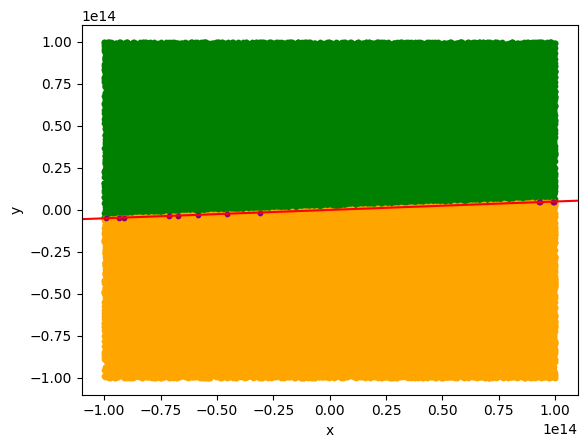

In [91]:
draw_line(*categorize_points(points_array[1],a,b,mat_det_2x2_lib,1e-14),s=10)
left,middle,right = categorize_points(points_array[1],a,b,mat_det_2x2_lib,1e-14)
# for ptest in left:
#     print(ptest)
# for ptest in middle:
#     print(middle)
# for ptest in right:
#     print(ptest)
